### Anomalies Detection on Health Insurance Claims

2. Training set integration
    + Features ingeneering

Se tratarán los modelos después de la segmentación

### Sinister Dataset Analysis

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
mpl.style.use('ggplot')
%matplotlib inline

We have to set the asumptions for te main query  
There's some trouble about the connections, after analyzing the training dataset

In [2]:
!pwd

/c/Users/A2276061/Documents/GMM


In [3]:
#df = pd.read_csv("Siniestros_Desc.csv", parse_dates=True, encoding="latin1")

In [131]:
import os

file = "C:\\Users\A2276061\Documents\GMM\Siniestros_Desc.csv"
pwd = os.getcwd()
df = pd.read_csv(os.path.basename(file), parse_dates=True, encoding="latin1")
print(pwd)

C:\Users\A2276061\Documents\GMM


In [132]:
#os.path.basename(file)

In [133]:
df=df.dropna(axis=0)
print(df.head())

     NSINIEST  NPOLIZA  RAMSUBRAMO RAMO        SUBRAMO DATE_INIT  INI_ANIO  \
272  12036775   671801       30041   AP   AP COLECTIVO  12/03/12         1   
273  12043520     1019        1038  GMM  GMM COLECTIVO  15/05/12         1   
274  12028046     1008        1038  GMM  GMM COLECTIVO  15/05/12         1   
276  11018531   282610        1028  GMM  GMM COLECTIVO  01/06/11         9   
279  10022000   315502        1026  GMM  GMM COLECTIVO  01/07/10         2   

     INDIVIDUAL  EDO STATE_NAME  ...     AGE SINISTER_DATE TIPOSIN  \
272           1    9       CDMX  ...     9.0      23/05/12     300   
273           2    9       CDMX  ...    56.0      02/08/12     100   
274           2    9       CDMX  ...    47.0      13/06/12     100   
276           2   19       N.L.  ...    49.0      02/06/11     100   
279           1   19       N.L.  ...    34.0      04/08/10     200   

    SIN_DECRIPTION                                    DIS_DESCRIPTION  COVERS  \
272      ACCIDENTE  TRAUMATIS

In [185]:
features = ['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT',
       'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME',
       'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE',
       'SINISTER_DATE', 'TIPOSIN', 'SIN_DECRIPTION', 'DIS_DESCRIPTION',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS', 'PAGADO',
       'GRUPO', 'is_train', 'TRAIN']

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [23]:
from sklearn.cluster import KMeans

# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=5, random_state=1)
# Get only the numeric columns from games.
df_transformed = df._get_numeric_data()

In [24]:
print(df_transformed.head())

     NSINIEST  NPOLIZA  RAMSUBRAMO  INI_ANIO  INDIVIDUAL  EDO  CITY  GENDER  \
272  12036775   671801       30041         1           1    9   1.0     1.0   
273  12043520     1019        1038         1           2    9   1.0     2.0   
274  12028046     1008        1038         1           2    9   1.0     2.0   
276  11018531   282610        1028         9           2   19   7.0     2.0   
279  10022000   315502        1026         2           1   19   7.0     2.0   

     CVNFUMA  RIESGOCUP  CVEDOCIV   AGE  TIPOSIN  COVERS  TOTAL_CLAIM  \
272      1.0        0.0       0.0   9.0      300     3.0      90493.0   
273      0.0        0.0       0.0  56.0      100     1.0    3023355.0   
274      0.0        0.0       0.0  47.0      100     1.0     134400.0   
276      0.0        0.0       0.0  49.0      100     1.0    3854796.0   
279      0.0        0.0       0.0  34.0      200     2.0    2614088.0   

     TOTAL_PAID  DIFF_MOUNT  CLAIMS  
272    180986.0    271479.0       1  
273   5865

In [19]:
binarizer = preprocessing.Binarizer(threshold=10)
new_anio= binarizer.transform(df_transformed['INI_ANIO'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
#df_transformed['INI_ANIO']=pd.DataFrame(np.transpose(new_anio))
#df_transformed

In [26]:
#deprecate al escalamiento
#X_scaled = preprocessing.scale(good_columns)
#X_scaled

In [56]:
df_normalized = preprocessing.normalize(df_transformed, norm='l2')
df_normalized 

array([[  9.98049450e-01,   5.57035101e-02,   2.49090006e-03, ...,
          1.50067587e-02,   2.25101380e-02,   8.29166824e-08],
       [  7.36228444e-01,   6.22921525e-05,   6.34536352e-05, ...,
          3.58550329e-01,   5.43370045e-01,   2.44522679e-07],
       [  9.99625636e-01,   8.37727625e-05,   8.62659995e-05, ...,
          1.11697017e-02,   2.23394033e-02,   8.31078993e-08],
       ..., 
       [  8.28107991e-01,   1.93292478e-02,   7.20609429e-05, ...,
          2.97970899e-01,   4.49554530e-01,   2.75041767e-07],
       [  9.99998702e-01,   9.73689669e-06,   9.87797777e-06, ...,
          6.57720663e-04,   1.31544133e-03,   3.28860331e-10],
       [  9.97248975e-01,   6.20625654e-02,   2.98689289e-03, ...,
          2.16055333e-02,   3.24082999e-02,   9.94272125e-08]])

In [28]:
#Ajuste de modelo normalizado
#kmeans_model.fit(good_columns)
kmeans_model.fit(X_normalized)
# Get the cluster assignments.
labels = kmeans_model.labels_

In [29]:
labels

array([0, 1, 0, ..., 2, 0, 0])

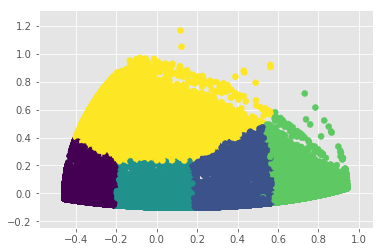

In [30]:
# Import the PCA model.
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(X_normalized)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], marker='o', s = 500, linewidths=2, c='none')
# Show the plot.
plt.show()

In [ ]:
#no corrio
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X_normalized)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

MemoryError: 

In [77]:
from sklearn import linear_model as lm
lr = lm.LinearRegression()

In [51]:
#df.columns
features=['NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT',
       'INI_ANIO', 'INDIVIDUAL', 'EDO', 'CITY','NASEG','GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE',
       'SINISTER_DATE', 'TIPOSIN', 'SIN_DECRIPTION', 'DIS_DESCRIPTION',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT', 'CLAIMS']
#features

In [72]:
features=['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'INI_ANIO', 'INDIVIDUAL', 'EDO',
       'CITY', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'TIPOSIN',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT']

In [73]:
features_train, features_test, claims_train, claims_test = train_test_split(df_transformed[features], 
                                                                            df_transformed['CLAIMS'], 
                                                                            test_size=0.33, random_state=42)

In [74]:
#hacer validación cruzada y predice
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(lr, features_train, claims_train, cv=10)

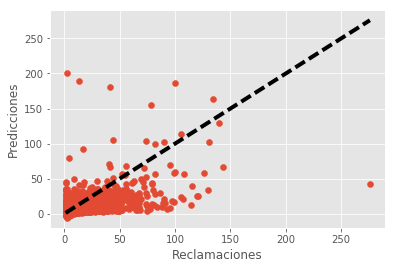

In [86]:
fig, ax = plt.subplots()
ax.scatter(claims_train, pred)
ax.plot([claims_train.min(), claims_train.max()], [claims_train.min(), claims_train.max()], 'k--', lw=4)
ax.set_xlabel('Reclamaciones')
ax.set_ylabel('Predicciones')
plt.show()

In [85]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((pred - claims_train) ** 2))
#tiene que tender a cero

Mean squared error: 10.20


In [91]:
#Ahora intentar con modelo polinomial
from sklearn.preprocessing import PolynomialFeatures

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [0.49, 0.18]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = lm.LinearRegression()
clf.fit(X_, vector)
print (clf.predict(predict_))

[ 126.84247142]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
feat_rf=['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'INI_ANIO', 'INDIVIDUAL', 'EDO',
       'CITY', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'TIPOSIN',
       'COVERS', 'TOTAL_CLAIM', 'TOTAL_PAID', 'DIFF_MOUNT']

In [105]:
# Configura los niveles de los arboles
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=400,random_state=4)

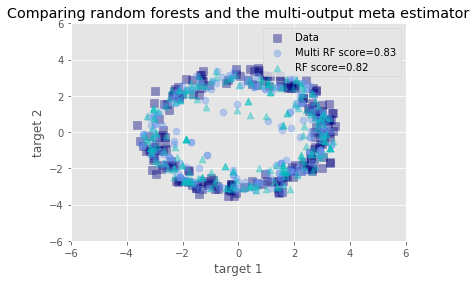

In [106]:
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1],
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1],
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1],
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

Analisis de enfermedades

In [172]:
df['GRUPO'] = df['DIS_DESCRIPTION'].str.split().str.get(0)
#df.head()

In [173]:
df['PAGADO'] = df['TOTAL_PAID']/100
print(df.head(3))

     NSINIEST  NPOLIZA  RAMSUBRAMO RAMO        SUBRAMO DATE_INIT  INI_ANIO  \
272  12036775   671801       30041   AP   AP COLECTIVO  12/03/12         1   
273  12043520     1019        1038  GMM  GMM COLECTIVO  15/05/12         1   
274  12028046     1008        1038  GMM  GMM COLECTIVO  15/05/12         1   

     INDIVIDUAL  EDO STATE_NAME     ...       TIPOSIN SIN_DECRIPTION  \
272           1    9       CDMX     ...           300      ACCIDENTE   
273           2    9       CDMX     ...           100     ENFERMEDAD   
274           2    9       CDMX     ...           100     ENFERMEDAD   

                                       DIS_DESCRIPTION COVERS  TOTAL_CLAIM  \
272  TRAUMATISMO DE CADERA                         ...    3.0      90493.0   
273  ESPOLON CALCANEO                              ...    1.0    3023355.0   
274  LITIASIS RENAL                                ...    1.0     134400.0   

     TOTAL_PAID  DIFF_MOUNT  CLAIMS    PAGADO        GRUPO  
272    180986.0    27147

In [174]:
enf_desc = df.groupby('GRUPO').sum()
enf_desc = enf_desc[['CLAIMS','PAGADO']]

In [175]:
enf_desc['AVG_RECLAM'] = enf_desc['PAGADO']/enf_desc['CLAIMS']
enf_desc = enf_desc.sort_values(by='AVG_RECLAM', ascending=False)
print(enf_desc.head(5))

                   CLAIMS      PAGADO    AVG_RECLAM
GRUPO                                              
PLOITRAMATISMO          1  2000000.00  2.000000e+06
TETRALOGIA              8  5055537.31  6.319422e+05
SCASEST                 1   498620.54  4.986205e+05
POLITRAUMATIZADO-       3  1452900.04  4.843000e+05
COXARTOSIS              1   432068.66  4.320687e+05


In [176]:
print(enf_desc.sort_values(by='CLAIMS', ascending=False).head(10))

             CLAIMS        PAGADO    AVG_RECLAM
GRUPO                                          
ESGUINCE      28946  1.356752e+08   4687.183621
FRACTURA      18605  2.623691e+08  14102.072219
EMBARAZO      15444  2.951436e+08  19110.567449
CONTUSION     12544  4.993131e+07   3980.493668
HERNIA        11792  3.075001e+08  26077.010773
LESION         8986  1.785976e+08  19875.099422
TRAUMATISMO    8416  6.931000e+07   8235.503752
FX             8386  9.026516e+07  10763.792380
HERIDA         8006  4.488575e+07   5606.513923
CESAREA        6720  1.040156e+08  15478.514310


In [177]:
#quitando arriba de 500k
enf_desc[enf_desc['AVG_RECLAM']<100000]['AVG_RECLAM'].mean()

16831.66084925169

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
df['TRAIN'] = np.random.uniform(0, 1, len(df)) <= .75
# View the top 5 rows
train, test = df[df['TRAIN']==True], df[df['TRAIN']==False]

In [181]:
print('Datos en entrenamiento:', len(train))
print('Datos en prueba:',len(test))

Datos en entrenamiento: 138592
Datos en prueba: 46081


In [206]:
features_clf = ['RAMSUBRAMO'#,'RAMO','SUBRAMO',
                ,'INI_ANIO','EDO',
                   'GENDER','CVNFUMA','RIESGOCUP','AGE','TIPOSIN','COVERS','PAGADO']

In [208]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features_clf], target)

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000000002CEBAE0, fil...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000000002CEBAE0, fil...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__pycache__\__main__.cpython-36.pyc', '__doc__': None, '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...da3\\lib\\site-packages\\ipykernel\\__main__.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-05-12T14:02:05.334000', 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'session': 'F7C935D0D65A4F0F89F64930A734E1BB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'F7C935D0D65A4F0F89F64930A734E1BB']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-05-12T14:02:05.334000', 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'session': 'F7C935D0D65A4F0F89F64930A734E1BB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'F7C935D0D65A4F0F89F64930A734E1BB'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-05-12T14:02:05.334000', 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'session': 'F7C935D0D65A4F0F89F64930A734E1BB', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '687E30CAC1B7480F854C9E067C11FF91', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# Create a random forest classifier. By conventi...the species)\nclf.fit(train[features_clf], target)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-208-18e1f5381dec>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 3c244cf8, execution_c..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000000383C5300, file "<ipython-input-208-18e1f5381dec>", line 6>
        result = <ExecutionResult object at 3c244cf8, execution_c..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000000383C5300, file "<ipython-input-208-18e1f5381dec>", line 6>, result=<ExecutionResult object at 3c244cf8, execution_c..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000000383C5300, file "<ipython-input-208-18e1f5381dec>", line 6>
        self.user_global_ns = {'In': ['', "import matplotlib as mpl\nimport numpy as np\nimpo...ggplot')\nget_ipython().magic('matplotlib inline')", "get_ipython().system('pwd')", '#df = pd.read_csv("Siniestros_Desc.csv", parse_dates=True, encoding="latin1")', 'import os\n\nfile = "C:\\\\Users\\A2276061\\Documents\\..., parse_dates=True, encoding="latin1")\nprint(pwd)', '#os.path.basename(file)', 'df=df.dropna(axis=0)\nprint(df.head())', 'from sklearn.model_selection import train_test_s...n_test_split(df, test_size=0.33, random_state=42)', 'print(good_columns.head())', 'from sklearn.cluster import KMeans\n\n# Initialize...from games.\ngood_columns = df._get_numeric_data()', 'print(good_columns.head())', "binarizer = preprocessing.Binarizer(threshold=10...io= binarizer.transform(good_columns['INI_ANIO'])", "good_columns['INI_ANIO']=pd.DataFrame(np.transpose(new_anio))", '#deprecate al escalamiento\n#X_scaled = preprocessing.scale(good_columns)\n#X_scaled', "X_normalized = preprocessing.normalize(good_columns, norm='l2')\nX_normalized ", 'from sklearn.cluster import KMeans\n\n# Initialize...from games.\ngood_columns = df._get_numeric_data()', 'from sklearn.cluster import KMeans\n\n# Initialize...om games.\ndf_transformed = df._get_numeric_data()', 'print(df_transformed.head())', 'print(df_transformed.head())', "binarizer = preprocessing.Binarizer(threshold=10...= binarizer.transform(df_transformed['INI_ANIO'])", ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'MultiOutputRegressor': <class 'sklearn.multioutput.MultiOutputRegressor'>, 'Out': {22:           NSINIEST  NPOLIZA  RAMSUBRAMO  INI_ANI...   325950.0       1  

[184673 rows x 18 columns], 27: array([[  9.98049450e-01,   5.57035101e-02,   2....055333e-02,   3.24082999e-02,   9.94272125e-08]]), 29: array([0, 1, 0, ..., 2, 0, 0]), 32:           NSINIEST  NPOLIZA  RAMSUBRAMO RAMO    ...    325950.0      1  

[184673 rows x 28 columns], 36:           NSINIEST  NPOLIZA  RAMSUBRAMO RAMO    ...2028    2173.000000  

[184673 rows x 30 columns], 37: Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAM...', 'DIFF_MOUNT', 'CLAIMS'],
      dtype='object'), 39: Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAM...', 'DIFF_MOUNT', 'CLAIMS'],
      dtype='object'), 40: [['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT', 'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME', 'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'SINISTER_DATE', ...]], 47:         NPOLIZA  RAMSUBRAMO RAMO         SUBRAMO...   325950.0       1  

[184673 rows x 24 columns], 55:           NSINIEST  NPOLIZA  RAMSUBRAMO  INI_ANI...   325950.0       1  

[184673 rows x 18 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X': array([[ -9.99771250e+01],
       [ -9.99195950e...  [  9.93506850e+01],
       [  9.94645701e+01]]), 'X_': array([[ 1.    ,  0.44  ,  0.68  ,  0.1936,  0.2... ,  0.99  ,  0.23  ,  0.9801,  0.2277,  0.0529]]), ...}
        self.user_ns = {'In': ['', "import matplotlib as mpl\nimport numpy as np\nimpo...ggplot')\nget_ipython().magic('matplotlib inline')", "get_ipython().system('pwd')", '#df = pd.read_csv("Siniestros_Desc.csv", parse_dates=True, encoding="latin1")', 'import os\n\nfile = "C:\\\\Users\\A2276061\\Documents\\..., parse_dates=True, encoding="latin1")\nprint(pwd)', '#os.path.basename(file)', 'df=df.dropna(axis=0)\nprint(df.head())', 'from sklearn.model_selection import train_test_s...n_test_split(df, test_size=0.33, random_state=42)', 'print(good_columns.head())', 'from sklearn.cluster import KMeans\n\n# Initialize...from games.\ngood_columns = df._get_numeric_data()', 'print(good_columns.head())', "binarizer = preprocessing.Binarizer(threshold=10...io= binarizer.transform(good_columns['INI_ANIO'])", "good_columns['INI_ANIO']=pd.DataFrame(np.transpose(new_anio))", '#deprecate al escalamiento\n#X_scaled = preprocessing.scale(good_columns)\n#X_scaled', "X_normalized = preprocessing.normalize(good_columns, norm='l2')\nX_normalized ", 'from sklearn.cluster import KMeans\n\n# Initialize...from games.\ngood_columns = df._get_numeric_data()', 'from sklearn.cluster import KMeans\n\n# Initialize...om games.\ndf_transformed = df._get_numeric_data()', 'print(df_transformed.head())', 'print(df_transformed.head())', "binarizer = preprocessing.Binarizer(threshold=10...= binarizer.transform(df_transformed['INI_ANIO'])", ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'MultiOutputRegressor': <class 'sklearn.multioutput.MultiOutputRegressor'>, 'Out': {22:           NSINIEST  NPOLIZA  RAMSUBRAMO  INI_ANI...   325950.0       1  

[184673 rows x 18 columns], 27: array([[  9.98049450e-01,   5.57035101e-02,   2....055333e-02,   3.24082999e-02,   9.94272125e-08]]), 29: array([0, 1, 0, ..., 2, 0, 0]), 32:           NSINIEST  NPOLIZA  RAMSUBRAMO RAMO    ...    325950.0      1  

[184673 rows x 28 columns], 36:           NSINIEST  NPOLIZA  RAMSUBRAMO RAMO    ...2028    2173.000000  

[184673 rows x 30 columns], 37: Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAM...', 'DIFF_MOUNT', 'CLAIMS'],
      dtype='object'), 39: Index(['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAM...', 'DIFF_MOUNT', 'CLAIMS'],
      dtype='object'), 40: [['NSINIEST', 'NPOLIZA', 'RAMSUBRAMO', 'RAMO', 'SUBRAMO', 'DATE_INIT', 'INI_ANIO', 'INDIVIDUAL', 'EDO', 'STATE_NAME', 'CITY', 'CITY_NAME', 'NASEG', 'NOMBTIT', 'GENDER', 'CVNFUMA', 'RIESGOCUP', 'CVEDOCIV', 'AGE', 'SINISTER_DATE', ...]], 47:         NPOLIZA  RAMSUBRAMO RAMO         SUBRAMO...   325950.0       1  

[184673 rows x 24 columns], 55:           NSINIEST  NPOLIZA  RAMSUBRAMO  INI_ANI...   325950.0       1  

[184673 rows x 18 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X': array([[ -9.99771250e+01],
       [ -9.99195950e...  [  9.93506850e+01],
       [  9.94645701e+01]]), 'X_': array([[ 1.    ,  0.44  ,  0.68  ,  0.1936,  0.2... ,  0.99  ,  0.23  ,  0.9801,  0.2277,  0.0529]]), ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\A2276061\Documents\GMM\<ipython-input-208-18e1f5381dec> in <module>()
      1 # Create a random forest classifier. By convention, clf means 'classifier'
      2 clf = RandomForestClassifier(n_jobs=2)
      3 
      4 # Train the classifier to take the training features and learn how they relate
      5 # to the training y (the species)
----> 6 clf.fit(train[features_clf], target)
      7 
      8 
      9 
     10 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), X=array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), y=array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), sample_weight=None)
    321             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    322                              backend="threading")(
    323                 delayed(_parallel_build_trees)(
    324                     t, self, X, y, sample_weight, i, len(trees),
    325                     verbose=self.verbose, class_weight=self.class_weight)
--> 326                 for i, t in enumerate(trees))
        i = 9
    327 
    328             # Collect newly grown trees
    329             self.estimators_.extend(trees)
    330 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Fri May 12 14:09:58 2017
PID: 6720                 Python 3.6.0: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1140805641, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1140805641, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1140805641, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), X=array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), y=array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...False, random_state=1140805641, splitter='best')>
        X = array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32)
        y = array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]])
        sample_weight = None
        curr_sample_weight = array([ 1.,  0.,  1., ...,  1.,  0.,  0.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1140805641, splitter='best'), X=array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), y=array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), sample_weight=array([ 1.,  0.,  1., ...,  1.,  0.,  0.]), check_input=False, X_idx_sorted=None)
    734 
    735         super(DecisionTreeClassifier, self).fit(
    736             X, y,
    737             sample_weight=sample_weight,
    738             check_input=check_input,
--> 739             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    740         return self
    741 
    742 
    743     def predict_proba(self, X, check_input=True):

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1140805641, splitter='best'), X=array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32), y=array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]]), sample_weight=array([ 1.,  0.,  1., ...,  1.,  0.,  0.]), check_input=False, X_idx_sorted=None)
    345                                            min_weight_leaf,
    346                                            max_depth,
    347                                            max_leaf_nodes,
    348                                            self.min_impurity_split)
    349 
--> 350         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[  3.00410000e+04,   1.00000000e+00,   9.....00000000e+00,   4.33346406e+04]], dtype=float32)
        y = array([[   1.],
       [   2.],
       [   3.],
...
       [   0.],
       [ 150.],
       [  25.]])
        sample_weight = array([ 1.,  0.,  1., ...,  1.,  0.,  0.])
        X_idx_sorted = None
    351 
    352         if self.n_outputs_ == 1:
    353             self.n_classes_ = self.n_classes_[0]
    354             self.classes_ = self.classes_[0]

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build (sklearn\tree\_tree.c:4999)()
    137 
    138 
    139 
    140 
    141 
--> 142 
    143 
    144 
    145 
    146 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build (sklearn\tree\_tree.c:4826)()
    264 
    265 
    266 
    267 
    268 
--> 269 
    270 
    271 
    272 
    273 

MemoryError: 
___________________________________________________________________________

In [7]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [9]:
print (X)

[[ -5.19811282e+00   6.41869316e-01]
 [ -5.75229538e+00   4.18627111e-01]
 [ -1.08448984e+01  -7.55352273e+00]
 ..., 
 [  1.36105255e+00  -9.07491863e-01]
 [ -3.54141108e-01   7.12241630e-01]
 [  1.88577252e+00   1.41185693e-03]]


In [ ]:
plt.figure(figsize=(12, 12))

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [11]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [12]:
missing = missing_values_table(df1)
missing = missing[missing['Missing Values'] > 0] #showing only all those are not zero
print(missing)

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


TypeError: Empty 'DataFrame': no numeric data to plot

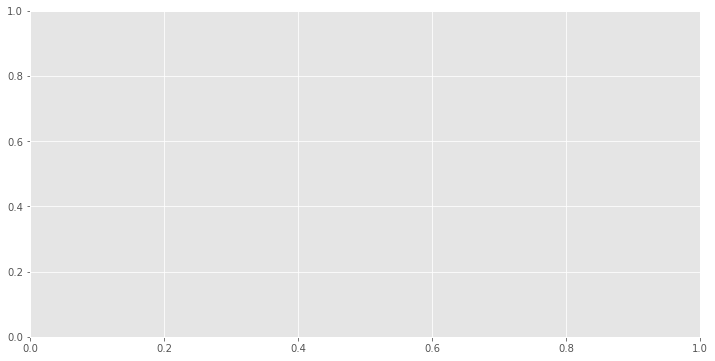

In [13]:
fig = plt.figure(figsize=[12, 6])

ax = missing['% of Total Values'].plot(kind='bar', width=0.8, alpha=0.5, color='#003399', edgecolor='#333333')
ax.yaxis.grid(True)
ax.set_title('% Missing Values')
ax.set_ylabel('Percentage')

fig.tight_layout() #for some reason this line should stay here
plt.show()

As we see the missing values are not gonna represent an important issue for data analysis, we have to decide as well
+ Imputation methods
+ Excusion methods

In [24]:
#Filling Na??
df['COVERS'].fillna(df['COVERS'].mean()).mean()

2.3002919748367736

In [26]:
df_head = df.sort_values(['CLAIMS'], ascending=False).head(20)
print(df_head[['INI_ANIO','CITY_NAME','NOMBTIT','AGE','SINISTER_DATE','SIN_DECRIPTION','TOTAL_PAID','CLAIMS']])

        INI_ANIO         CITY_NAME                              NOMBTIT   AGE  \
9528           5  CIUDAD DE MEXICO                 FELIPE SIADE BARQUET  59.0   
165409         7         MONTERREY                  ALDO GUTIERREZ VEGA  46.0   
31382          6         MONTERREY  DIANA FERNANDA DE LA ROSA RODRIGUEZ   1.0   
95031          1         MONTERREY     ALVARADO QUIROZ FRANCISCO JAVIER  38.0   
69731          1         MONTERREY                 SILVA CHAIREZ FABIAN  29.0   
226153         1       GUADALAJARA                  GARCIA LEAL GERARDO  45.0   
139524         1         MONTERREY          RUBEN DARIO MARTINEZ CASTRO  39.0   
215633         2  CIUDAD DE MEXICO                 FELIPE SIADE BARQUET  56.0   
219437         1         MONTERREY     MARIA DEL SAGRARIO BARREDA PEREZ  54.0   
247177        10     CIUDAD JUAREZ              SAMUEL MIRANDA MARTINEZ  43.0   
21384          2         MONTERREY       GUAJARDO ELIZONDO LUIS GERARDO  47.0   
54371          1         MON

What happen with the cases like FELIPE SIADE BARQUET where we found is showing more than once
+ Let's check the policy number, whats wrong?
+ Why the calculated age is diferent?

In [27]:
df.shape

(262029, 28)

In [28]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
df.describe()

,NSINIEST,NPOLIZA,RAMSUBRAMO,INI_ANIO,INDIVIDUAL,EDO,CITY,GENDER,CVNFUMA,RIESGOCUP,CVEDOCIV,AGE,TIPOSIN,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS
count,2.620e+05,2.620e+05,262029.000,262029.000,262029.000,262029.000,238407.000,244366.000,244366.000,244366.000,244366.000,244366.000,262029.000,217142.000,2.419e+05,2.419e+05,2.419e+05,262029.000
mean,3.215e+07,7.073e+05,9840.941,3.703,1.413,13.598,5.159,1.313,0.115,0.054,0.301,25.394,198.264,2.300,3.263e+06,5.550e+06,8.702e+06,2.639
std,2.419e+08,1.492e+06,13343.930,3.608,0.492,7.541,4.163,0.657,0.319,0.431,0.646,19.355,100.290,1.078,1.322e+07,2.244e+07,3.323e+07,3.873
min,1.100e+02,1.300e+01,110.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,100.000,1.000,1.000e+00,0.000e+00,0.000e+00,1.000
25%,7.028e+06,1.134e+05,1021.000,1.000,1.000,9.000,1.000,1.000,0.000,0.000,0.000,10.000,100.000,1.000,2.410e+05,4.095e+05,6.603e+05,1.000
50%,1.101e+07,2.771e+05,1046.000,2.000,1.000,14.000,6.000,1.000,0.000,0.000,0.000,25.000,200.000,2.000,9.657e+05,1.571e+06,2.559e+06,2.000
75%,1.306e+07,6.242e+05,30041.000,5.000,2.000,19.000,7.000,2.000,0.000,0.000,0.000,39.000,300.000,3.000,2.856e+06,4.749e+06,7.523e+06,3.000
max,3.051e+09,9.970e+06,30053.000,97.000,2.000,33.000,23.000,2.000,2.000,7.000,4.000,113.000,800.000,6.000,1.414e+09,2.416e+09,3.799e+09,276.000


The matrix shape is logical?:
- 1 
- 2 

In [29]:
df['CITY_NAME'].str.upper().value_counts().head(10) #equivalent grouping

MONTERREY           71282
CIUDAD DE MEXICO    60772
GUADALAJARA         16813
AGUASCALIENTES       5226
CIUDAD JUAREZ        5200
QUERETARO            4947
TAMPICO              4725
TORREON              4649
TOLUCA DE LERDO      4398
SALTILLO             4266
Name: CITY_NAME, dtype: int64

In [32]:
#In case we have classes
sin_desc = df.groupby('SIN_DECRIPTION').size()
print(sin_desc)

SIN_DECRIPTION
ACC TRANS        752
ACCIDENTE     112348
DESEMPLEO          3
EMBARAZO       16659
ENFERMEDAD    127810
GTOS.FUNE.        12
INV.TOTAL         52
MA X VIOLE       693
MTE. ACC.       2652
MUERTE           772
PERD.ORG.        271
SUICIDIO           5
dtype: int64


In [38]:
#correlations
numeric_features = df[['INI_ANIO','AGE','COVERS','TOTAL_CLAIM','TOTAL_PAID','DIFF_MOUNT','CLAIMS']]
correlations = numeric_features.corr(method='pearson')
print(correlations)

             INI_ANIO    AGE  COVERS  TOTAL_CLAIM  TOTAL_PAID  DIFF_MOUNT  CLAIMS
INI_ANIO        1.000  0.149   0.088        0.021       0.018       0.020   0.016
AGE             0.149  1.000   0.056        0.158       0.153       0.164   0.204
COVERS          0.088  0.056   1.000       -0.021      -0.024      -0.023   0.036
TOTAL_CLAIM     0.021  0.158  -0.021        1.000       0.967       0.950   0.557
TOTAL_PAID      0.018  0.153  -0.024        0.967       1.000       0.963   0.585
DIFF_MOUNT      0.020  0.164  -0.023        0.950       0.963       1.000   0.594
CLAIMS          0.016  0.204   0.036        0.557       0.585       0.594   1.000


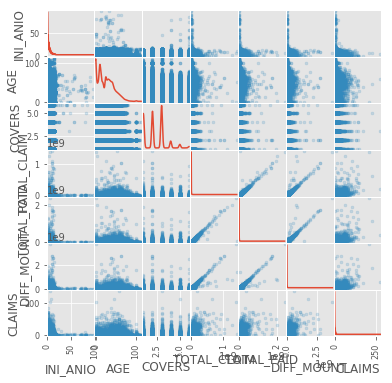

In [60]:
plt.figure(figsize=[10,10])
scatter_matrix(numeric_features, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [41]:
skew = numeric_features.skew()
print(skew)

INI_ANIO        3.010
AGE             0.606
COVERS          0.680
TOTAL_CLAIM    38.438
TOTAL_PAID     36.022
DIFF_MOUNT     33.608
CLAIMS         12.714
dtype: float64


---
Is clear we need to scalate and normalize

##### Time Serires

For this dataset we are analysing the sinisters global, the natural approach is visualize the time series envolved  

The fisrt thing we have to do is convert date fields on data type, because as we see on dtypes is not clear

In [42]:
#Beging of 
df['SINISTER_DATE']=pd.to_datetime(df['SINISTER_DATE'])
df['DATE_INIT']=pd.to_datetime(df['DATE_INIT'])
df.head()

,NSINIEST,NPOLIZA,RAMSUBRAMO,RAMO,SUBRAMO,DATE_INIT,INI_ANIO,INDIVIDUAL,EDO,STATE_NAME,...,AGE,SINISTER_DATE,TIPOSIN,SIN_DECRIPTION,DIS_DESCRIPTION,COVERS,TOTAL_CLAIM,TOTAL_PAID,DIFF_MOUNT,CLAIMS
0,16039182,1011,1035,GMM,GMM COLECTIVO,2015-01-08,1,1,19,N.L.,...,NaN,2016-08-16,300,ACCIDENTE,RUPTURA DE MENISCO MEDIAL + LISTESIS OSEA RODI...,NaN,NaN,NaN,NaN,2
1,17003837,610201,1035,GMM,GMM COLECTIVO,2016-09-30,2,2,14,JAL,...,NaN,2012-01-01,100,ENFERMEDAD,FISTULA ANAL CRIPTOGLANDULAR ...,NaN,NaN,NaN,NaN,2
2,16051270,101101,1030,GMM,GMM COLECTIVO,2016-01-05,2,2,11,GTO,...,NaN,2016-11-25,100,ENFERMEDAD,PARAFIMOSIS Y BALANITIS ...,NaN,NaN,NaN,NaN,6
3,16039194,22201,1026,GMM,GMM COLECTIVO,2015-09-28,1,2,8,CHIH,...,NaN,2016-08-18,100,ENFERMEDAD,SD PINZAMIENTO + TENDINOSIS PORCION LARGA DE B...,NaN,NaN,NaN,NaN,3
4,16046314,80102,1032,GMM,GMM COLECTIVO,2016-01-04,1,2,15,EDMEX,...,NaN,2016-10-25,300,ACCIDENTE,DESGARRO DEL MENISCO MEDIAL ...,NaN,NaN,NaN,NaN,2


In [43]:
df[['SINISTER_DATE','DATE_INIT']].dtypes

SINISTER_DATE    datetime64[ns]
DATE_INIT        datetime64[ns]
dtype: object

In [44]:
#take the fisrt column . groupby () and measure of aggregation
# like agg(['mean', 'count'])
dfy = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.year)).agg(['count'])
print(dfy.head())

               count
SINISTER_DATE       
2000             546
2001            4784
2002            5021
2003            5148
2004            7511


In [45]:
#test[['NSINIEST','AGE']].groupby(test['SINISTER_DATE'].map(lambda x: x.year)).agg(['count','mean'])
#this is just another approach of agregation

In [46]:
dfy.columns
dfy.dtypes

count    int64
dtype: object

In [47]:
#The rule we gonna use is excluding all the data with days more than 2 estandart deviatin_
two_dev = 2*dfy.std().astype(int)
two_dev

count    16968
dtype: int32

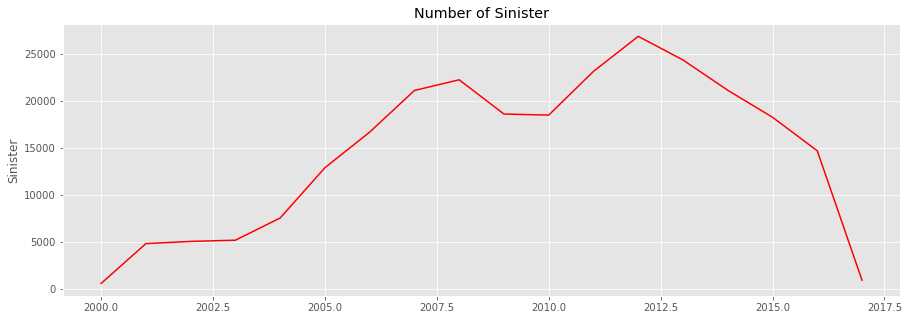

In [48]:
plt.figure(figsize=[15, 5])
plt.plot(dfy, color='red') 
plt.title("Number of Sinister")
plt.ylabel('Sinister')
plt.show()

+ Can we find something seasonal?
+ Sinister by month it matters? Let's make a plot by month

In [49]:
dfm = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.month)).agg(['count'])
print(dfm.head())

               count
SINISTER_DATE       
1              30094
2              21938
3              22344
4              21623
5              24100


In [50]:
two_dev = 2*dfy.std().astype(int)
two_dev

count    16968
dtype: int32

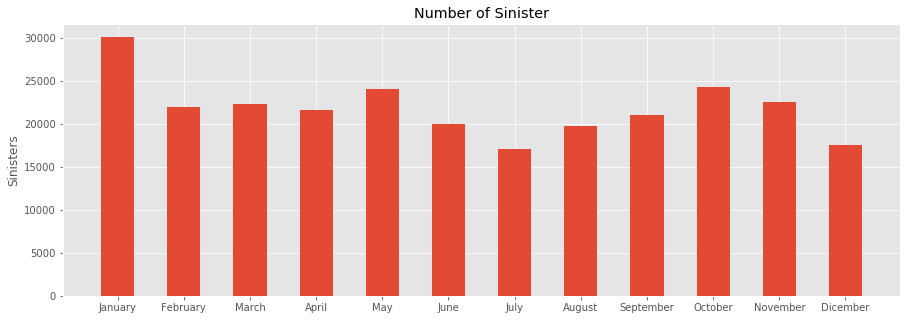

In [51]:
plt.figure(figsize=[15,5])
axx=np.arange(dfm.count())
plt.xticks(axx, ('January', 'February', 'March', 'April', 'May', 
            'June', 'July', 'August', 'September', 'October', 'November', 'Dicember'))
plt.ylabel('Sinisters')
plt.title('Number of Sinister')
plt.bar(axx, dfm['count'], width=.5)
plt.show()

The best approach is convert this to series, and take out the outliers

In [52]:
#df_dates = df.groupby(df['SINISTER_DATE'].apply(lambda x : x.date()))
#df_dates['SINISTER_DATE'].aggregate(len)

df_dates = df['NSINIEST'].groupby(df['SINISTER_DATE'].map(lambda x: x.date())).agg(['count'])
print(df_dates.head())

               count
SINISTER_DATE       
2000-01-01        12
2000-01-02         3
2000-01-03         3
2000-01-04         7
2000-01-05         4


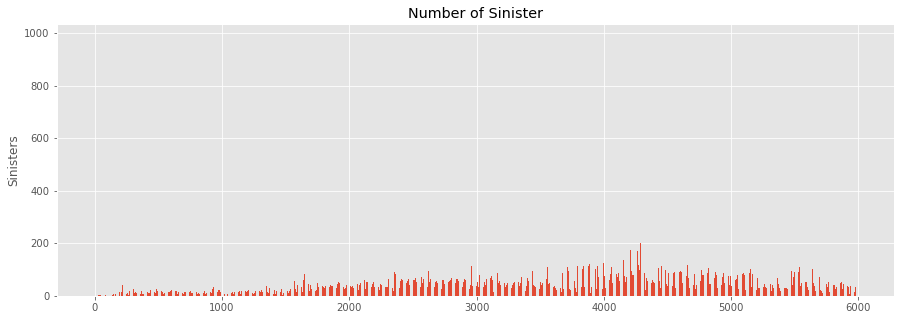

In [205]:
plt.figure(figsize=[15,5])
plt.ylabel('Sinisters')
plt.title('Number of Sinister')
plt.bar(np.arange(df_dates.count()), df_dates['count'], width=.5)
plt.show()

In [54]:
df_dates.describe()

,count
count,5979.000
mean,43.825
std,36.490
min,1.000
25%,20.000
50%,38.000
75%,60.000
max,986.000


First of all, the mean changes a lot